In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (849).jpg
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (276).JPG
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (971).jpg
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (864).JPG
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (282).JPG
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (566).JPG
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (689).JPG
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (616).JPG
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image (258).JPG
/kaggle/input/top-agriculture-crop-disease/Crop Diseases/Corn___Northern_Leaf_Blight/image 

In [14]:
data="/kaggle/input/top-agriculture-crop-disease/Crop Diseases"
print(os.listdir(data))
len(os.listdir(data))

['Corn___Northern_Leaf_Blight', 'Wheat___Yellow_Rust', 'Sugarcane_Bacterial Blight', 'Potato___Healthy', 'Rice___Neck_Blast', 'Corn___Healthy', 'Wheat___Brown_Rust', 'Corn___Gray_Leaf_Spot', 'Rice___Brown_Spot', 'Sugarcane_Red Rot', 'Sugarcane_Healthy', 'Wheat___Healthy', 'Rice___Leaf_Blast', 'Potato___Late_Blight', 'Rice___Healthy', 'Corn___Common_Rust', 'Potato___Early_Blight']


17

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train="/kaggle/input/top-agriculture-crop-disease/Crop Diseases"

train_datagen =ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2           
)
train_data=train_datagen.flow_from_directory(
    train,
    target_size=(250,250),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

validation_data= train_datagen.flow_from_directory(
    train,
    target_size=(250,250),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

Found 10664 images belonging to 17 classes.
Found 2660 images belonging to 17 classes.


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


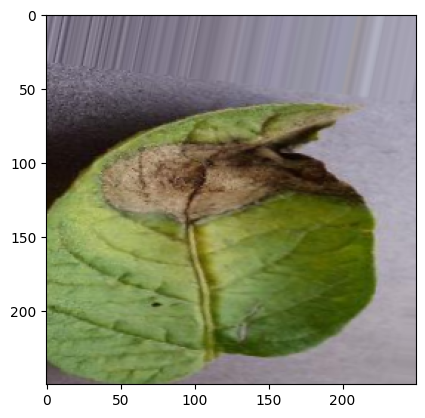

In [16]:
images, labels=next(train_data)

import matplotlib.pyplot as plt

plt.imshow(images[2])
print(labels[2])

In [17]:
import tensorflow as tf
from  tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,AveragePooling2D
from tensorflow.keras.optimizers import Adam

In [18]:
model= Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(250,250,3)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Conv2D(264,(3,3),activation="relu")) 
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(264,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
model.add(Dense(17, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()











Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 124, 124, 32)   │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 61, 61, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_6             │ (None, 29, 29, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 27, 27, 264)    │       304,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_7             │ (None, 13, 13, 264)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 44616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 264)            │    11,778,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 264)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        33,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 17)             │           561 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,221,345 (46.62 MB)

 Trainable params: 12,221,345 (46.62 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping=EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

checkpoint= ModelCheckpoint(
     'best_model.keras',
    monitor="val_loss",
    save_best_only=True,
    verbose=1
      
)


In [20]:
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.1616 - loss: 2.4738
Epoch 1: val_loss improved from inf to 1.45125, saving model to best_model.keras
334/334 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.1619 - loss: 2.4729 - val_accuracy: 0.4139 - val_loss: 1.4512
Epoch 2/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.3965 - loss: 1.6005
Epoch 2: val_loss improved from 1.45125 to 1.18957, saving model to best_model.keras
334/334 ━━━━━━━━━━━━━━━━━━━━ 327s 980ms/step - accuracy: 0.3965 - loss: 1.6003 - val_accuracy: 0.5361 - val_loss: 1.1896
Epoch 3/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.4767 - loss: 1.3418
Epoch 3: val_loss improved from 1.18957 to 1.07901, saving model to best_model.keras
334/334 ━━━━━━━━━━━━━━━━━━━━ 329s 987ms/step - accuracy: 0.4767 - loss: 1.3417 - val_accuracy: 0.6320 - val_loss: 1.0790
Epoch 4/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.5116 - loss: 1.2187
Epoch 4: val_loss improved from 1.079

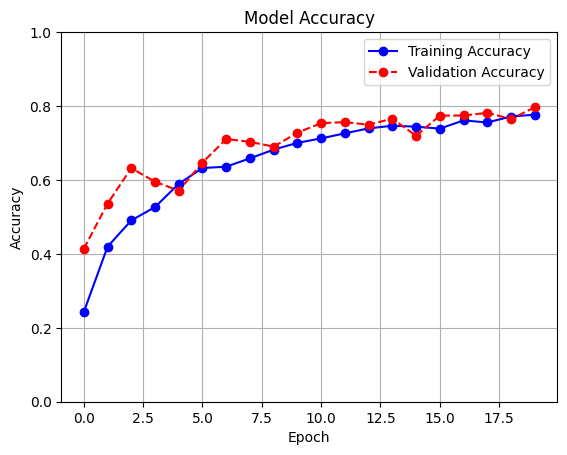

In [21]:

plt.plot(history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'ro--', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.grid(True)

plt.show()

In [22]:

model.save("mera_model.h5")


In [23]:
import shutil

shutil.move("mera_model.h5", "/kaggle/working/mera_model.h5")


'/kaggle/working/mera_model.h5'